## Librerias

In [1]:
from IPython.display import Image
import numpy as np
import scipy.fftpack as fourier
import matplotlib.pyplot as plt
import scipy.io.wavfile as waves
import winsound
from IPython.display import Audio

## 2. Identificación Frecucencia Predominante en Señal Discreta

Crearemos una señal compuesta por dos ondas sinusoidales de 1000 Hz y 2000 Hz. Agregaremos ruido a la señal compuesta y luego mediante la FFT identificaremos las frecuencias predominantes de la señal sintética

<function matplotlib.pyplot.show(close=None, block=None)>

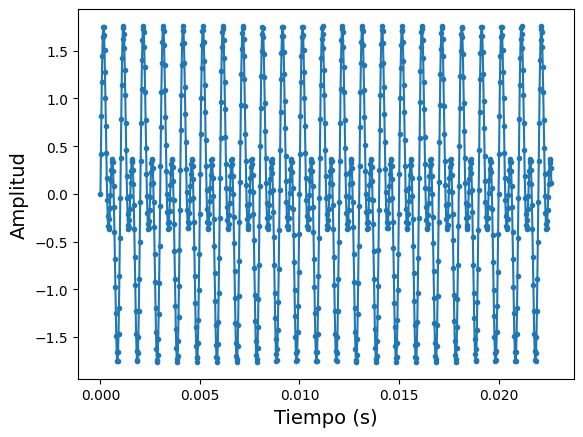

In [2]:
fs = 44100         # frecuencia de muestreo 
ts = 1/fs          # tiempo de muestreo
w1 = 2*np.pi*1000  # Para modular un 1
w2 = 2*np.pi*2000  # Para modular un 2


n = ts*np.arange(0,1000)
ruido = np.random.random(len(n))


# Formando la senial compuesta
x = np.sin(w1*n)  + np.sin(w2*n) 

%matplotlib inline
plt.plot(n,x,'.-')
plt.xlabel('Tiempo (s)', fontsize='14')
plt.ylabel('Amplitud', fontsize='14')
plt.show

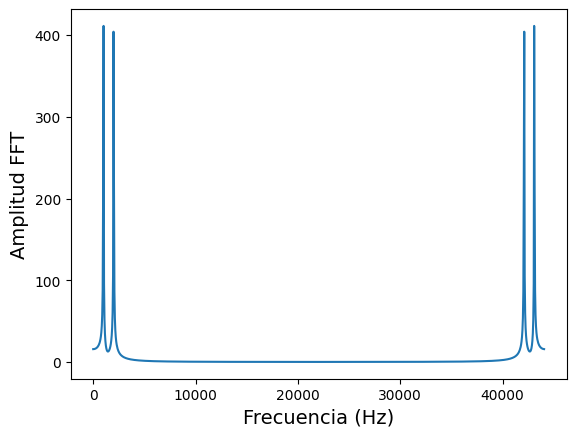

In [3]:
gk = fourier.fft(x)                 # Calculamos la FFT
M_gk = abs(gk)                      # Calculamos la Magnitud de la FFT

F = fs*np.arange(0, len(x))/len(x)    

plt.plot(F, M_gk)
plt.xlabel('Frecuencia (Hz)', fontsize='14')
plt.ylabel('Amplitud FFT', fontsize='14')
plt.show()

## Graficar audio

In [4]:
filename ='C:\Proyects\Modem-Audio\Sonidos\grabacion.wav'
winsound.PlaySound(filename, winsound.SND_FILENAME)  # Reproducir sonido

Fs, data = waves.read(filename)
Audio_m = data 

L = len(Audio_m)

n = np.arange(0, L)/ Fs

plt.plot(n,Audio_m)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Proyects\\Modem-Audio\\Sonidos\\grabacion.wav'

In [36]:
Audio_m.shape

(43200,)

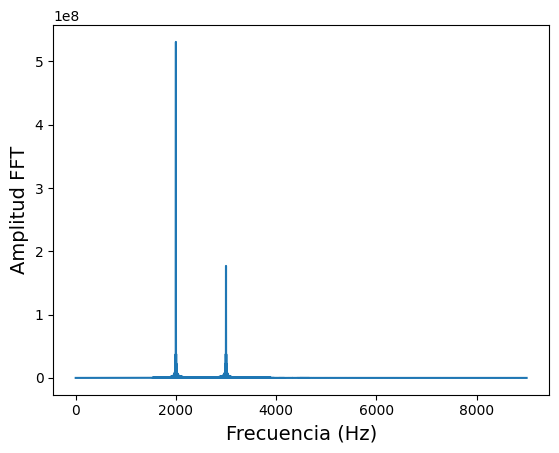

In [40]:
gk = fourier.fft(Audio_m)  # Calcular la FFT de la señal de audio
M_gk = abs(gk)
M_gk = M_gk[0:L//2]

Ph_gk = np.angle(gk)
F = Fs*np.arange(0, L//2)/L

plt.plot(F, M_gk)
plt.xlabel('Frecuencia (Hz)', fontsize='14')
plt.ylabel('Amplitud FFT', fontsize='14')
plt.show()

In [45]:
Posm = np.where(M_gk == np.max(M_gk))           # Encontramos la posición para la cual la Magnitud de FFT es máxima
F_fund = F[Posm]                                # Identificamos la Frecuencia asociada al valor del máximo de la Magnitud de FFT

In [46]:

if F_fund > 1700 and F_fund < 2200:                   # Rango de frecuencias para nota RE
    print("Es un 1 ",F_fund)
elif F_fund > 700 and F_fund < 1200:                   # Rango de frecuencias para nota SOL
    print("Es un 0: ",F_fund)

Es un 1  [2000.]


## Modulacion FSK

In [5]:
from scipy.io import wavfile
import soundfile as sf

def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

def save_as_wav(file_name, signal, fs):
    # Asegurarse de que la señal sea de tipo entero de 16 bits
    sf.write(file_name, signal, fs)

    print(f"La grabación se guardó en {file_name}.")

def bfsk_modulate(bit_array, space_freq, mark_freq, baud, sample_rate):
    seconds_per_bit = 1 / baud
    samples_per_bit = int(sample_rate * seconds_per_bit)
    t = np.linspace(0, seconds_per_bit, samples_per_bit, endpoint=False)
    signal = np.array([])
    for bit in bit_array:
        if bit == 0:
            space = np.sin(2 * np.pi * space_freq * t)
            signal = np.append(signal, space)
        elif bit == 1:
            mark = np.sin(2 * np.pi * mark_freq * t)
            signal = np.append(signal, mark)
    return signal

In [110]:
sig_010110 = bfsk_modulate([0,1,0,1,1,0], 1000, 2000, 1, 44100)

In [111]:
Audio(sig_010110, rate=44100)

In [112]:
filename = 'C:\Proyects\Modem-Audio\Sonidos\FSK_pro.wav'
save_as_wav(signal=sig_010110, file_name=filename, fs=44100)

La grabación se guardó en C:\Proyects\Modem-Audio\Sonidos\FSK_pro.wav.


### Pruebas

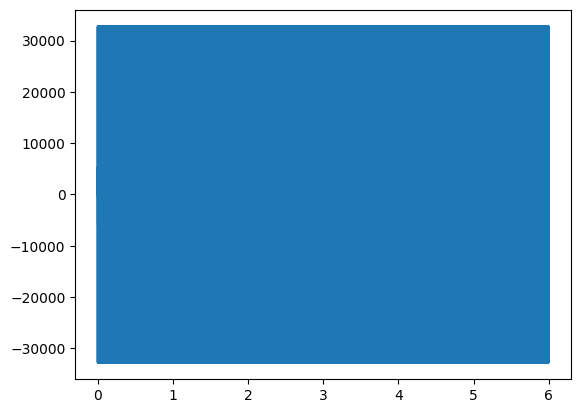

In [113]:
winsound.PlaySound(filename, winsound.SND_FILENAME)  # Reproducir sonido

Fs, data = waves.read(filename)
Audio_m = data 

L = len(Audio_m)

n = np.arange(0, L)/ Fs

plt.plot(n,Audio_m)
plt.show()

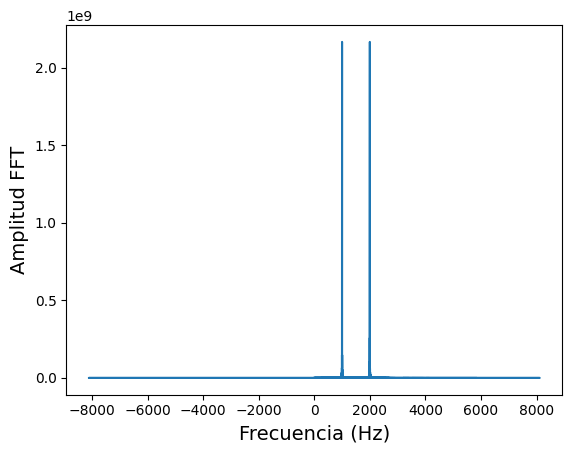

In [114]:
gk = fourier.fft(Audio_m)  # Calcular la FFT de la señal de audio
M_gk = abs(gk)
M_gk = M_gk[0:L//2]

Ph_gk = np.angle(gk)
F = Fs*np.arange(0, L//2)/L

plt.plot(F, M_gk)
plt.xlabel('Frecuencia (Hz)', fontsize='14')
plt.ylabel('Amplitud FFT', fontsize='14')
plt.show()

In [117]:
Posm = np.where(M_gk == np.max(M_gk))           # Encontramos la posición para la cual la Magnitud de FFT es máxima
F_fund = F[Posm]                                # Identificamos la Frecuencia asociada al valor del máximo de la Magnitud de FFT

print(F_fund)

[1000.]


In [118]:
# Encontrar el cambio de frecuencia
index_1000Hz = np.argmin(np.abs(F - 1000))  # Índice de frecuencia más cercano a 1000 Hz
index_2000Hz = np.argmin(np.abs(F - 2000))  # Índice de frecuencia más cercano a 2000 Hz

amplitud_1000Hz = M_gk[index_1000Hz]  # Amplitud en la frecuencia 1000 Hz
amplitud_2000Hz = M_gk[index_2000Hz]  # Amplitud en la frecuencia 2000 Hz

cambio_frecuencia = amplitud_2000Hz - amplitud_1000Hz  # Diferencia de amplitudes

print("Cambio de frecuencia:", cambio_frecuencia)

Cambio de frecuencia: -3284.071630001068
